In [1]:
from pyoculus.problems import CylindricalBfield, AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pickle

In [2]:
# separatrix = {"type": "circular-current-loop", "amplitude": -4.2, "R": 3, "Z": -2.2}
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
# separatrix = {"type": "circular-current-loop", "amplitude": -4, "R": 3, "Z": -2.2}
maxwellboltzmann = {"m": 7, "n": -1, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 0.1, "A": 1, "B": 2}
# gaussian10 = {"m": 1, "n": 0, "d": 1, "type": "gaussian", "amplitude": 0.1}

ps = AnalyticCylindricalBfield.without_axis(6, 0, 0.91, 0.6, perturbations_args = [separatrix], Rbegin = 2, Rend = 8, niter = 800, guess=[6.4,-0.7],  tol = 1e-9)
ps.add_perturbation(maxwellboltzmann)
# ps = AnalyticCylindricalBfield(3, 0, 0.9, 0.7, perturbations_args = [separatrix])

0 - dr : 0.02290324895580045
1 - RZ : [ 6.41398572 -0.69363305]
1 - dr : 0.0001521514183698729
2 - RZ : [ 6.41409781 -0.69367862]
2 - dr : 1.3221698258761472e-08
3 - RZ : [ 6.41409781 -0.69367863]
3 - dr : 3.568292035180542e-15
0 - dr : 3.5596458096434965e-15


### Finding fixed points

In [3]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-7

pparams = dict()
pparams["nrestart"] = 0
pparams['niter'] = 600

fp_perturbed = FixedPoint(ps, pparams, integrator_params=iparams)

# fp_perturbed.compute(guess=[fp.x[0], fp.z[0]], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[3.117263523069049, -1.6173346133145015], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[3.1072023810385443, -1.655410284892828], pp=0, qq=1, sbegin=0.1, send=6, tol = 4e-12)
# fp_perturbed.compute(guess=[3.117264916246293, -1.617334822348791], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[4.624454, 0.], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[4.43582958 -1.22440153], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
fp_perturbed.compute(guess=[6.2, -4.45], pp=0, qq=1, sbegin=1, send=8, tol = 1e-10)

0 - [DeltaR, DeltaZ] : [0.31173615 0.2138405 ] - dtheta : 0.08449022978024034
0 - [StepR, StepZ]: [-0.00118302 -0.04520414]
1 - RZ : [ 6.19881698 -4.49520414] - rhotheta : [ 3.80761632 -1.62736602]
1 - [DeltaR, DeltaZ] : [-0.11753869 -0.11778612] - dtheta : 0.02814491773408445
1 - [StepR, StepZ]: [0.00407528 0.0023742 ]
2 - RZ : [ 6.20289227 -4.49282994] - rhotheta : [ 3.80501754 -1.62633198]
2 - [DeltaR, DeltaZ] : [-0.00943189 -0.01458011] - dtheta : 0.0022533535789532877
2 - [StepR, StepZ]: [ 0.00281002 -0.00375591]
3 - RZ : [ 6.20570228 -4.49658586] - rhotheta : [ 3.80861288 -1.62554058]
3 - [DeltaR, DeltaZ] : [7.67243047e-05 2.13139128e-05] - dtheta : 1.980868804474234e-05
3 - [StepR, StepZ]: [ 1.64771197e-05 -3.42847330e-05]
4 - RZ : [ 6.20571876 -4.49662014] - rhotheta : [ 3.80864621 -1.62553576]
4 - [DeltaR, DeltaZ] : [-1.68349779e-10 -9.47335543e-10] - dtheta : 3.407696347323963e-11
4 - [StepR, StepZ]: [ 3.30419248e-10 -5.30092414e-10]
5 - RZ : [ 6.20571876 -4.49662014] - rhoth

In [4]:
results = [list(p) for p in zip(fp_perturbed.x, fp_perturbed.y, fp_perturbed.z)]

In [5]:
results

[[6.205718761264171, 0.0, -4.496620141391966],
 [6.2057187612640625, 0.0, -4.496620141392062]]

### Poincare

In [6]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 8
pparams["nPpts"] = 150
pparams["zeta"] = 0

# # Set RZs for the normal (R-only) computation
# pparams["Rbegin"] = 6.3
# pparams["Rend"] = 9.1

# Set RZs for the tweaked (R-Z) computation
nfieldlines = pparams["nPtrj"] + 1

# Directly setting the RZs
# Rs = np.linspace(6, 3.15, nfieldlines)
# Zs = np.linspace(-0.43, -2.5, nfieldlines)
# RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# Two interval computation opoint to xpoint then xpoint to coilpoint
n1, n2 = int(np.ceil(nfieldlines / 2)), int(np.floor(nfieldlines / 2))
xpoint = np.array([results[0][0], results[0][2]])
opoint = np.array([ps._R0, ps._Z0])
coilpoint = np.array(
    [ps.perturbations_args[0]["R"], ps.perturbations_args[0]["Z"]]
)

# Simple way from opoint to xpoint then to coilpoint
Rs = np.concatenate((np.linspace(opoint[0]+1e-4, xpoint[0], n1), np.linspace(xpoint[0], coilpoint[0]-1e-4, n2)))
Zs = np.concatenate((np.linspace(opoint[1]+1e-4, xpoint[1], n1), np.linspace(xpoint[1], coilpoint[1]-1e-4, n2)))
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# Sophisticated way more around the xpoint
# deps = 0.05
# RZ1 = xpoint + deps * (1 - np.linspace(0, 1, n1)).reshape((n1, 1)) @ (
#     opoint - xpoint
# ).reshape((1, 2))
# RZ2 = xpoint + deps * np.linspace(0, 1, n2).reshape((n2, 1)) @ (
#     coilpoint - xpoint
# ).reshape((1, 2))
# RZs = np.concatenate((RZ1, RZ2))

# Set up the Poincare plot object
pplot = PoincarePlot(ps, pparams, integrator_params=iparams)

In [7]:
# # R-only computation
# pplot.compute()

# R-Z computation
pplot.compute(RZs)

C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\imports\pyoculus\pyoculus\problems\cylindrical_bfield.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  dRdt = Bfield[0] / Bfield[1]
C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\imports\pyoculus\pyoculus\problems\cylindrical_bfield.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  dZdt = Bfield[2] / Bfield[1]


Integration failed for s= 5.9999


c:\Users\Ludovic\miniforge3\envs\simsopt\lib\site-packages\scipy\integrate\_ode.py:431: UserWarning: dopri5: larger nsteps is needed
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


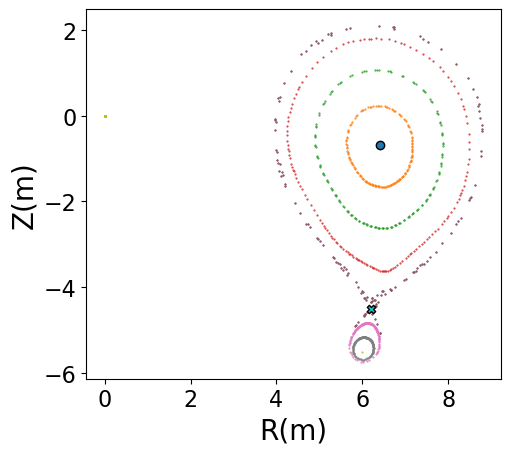

In [107]:
fig_perturbed, ax_perturbed = pplot.plot(marker=".", s=1)

ax_perturbed.scatter(results[0][0], results[0][2], marker="X", edgecolors="black", linewidths=1)
ax_perturbed.scatter(ps._R0, ps._Z0, marker="o", edgecolors="black", linewidths=1)
plt.show()

In [ ]:
date = datetime.datetime.now().strftime("%m%d%H%M")
dumpname = f"../output/toybox_tok_{date}.pkl"
with open(dumpname, "wb") as f:
    pickle.dump(fig_perturbed, f)

### Back on manifold

In [9]:
iparams = dict()
iparams["rtol"] = 1e-12

manifold = Manifold(fp_perturbed, ps, integrator_params=iparams)

In [10]:
# Choose the tangles to work with
manifold.choose()

manifold.find_N(1e-6, 1e-6)

(7, 7)

In [11]:
from scipy.optimize import root

def find_homoclinic(self, guess_eps_s = 1e-3, guess_eps_u = 1e-3, **kwargs):
    defaults = {"tol": 1e-10, "n_s": None, "n_u": None}
    defaults.update({key: value for key, value in kwargs.items() if key in defaults})

    if defaults['n_s'] is None or defaults['n_u'] is None:
        n_s, n_u = self.find_N(guess_eps_s, guess_eps_u)
        print(f"Found [n_s, n_u] : [{n_s}, {n_u}]")
    else:
        n_s, n_u = defaults['n_s'], defaults['n_u']

    def evolution(eps, n_s, n_u):
        eps_s, eps_u = eps
        r_s = self.rfp_s + eps_s * self.vector_s
        r_u = self.rfp_u + eps_u * self.vector_u

        r_s_evolved, jac_s = self.integrate_single(r_s, n_s, -1)
        r_u_evolved, jac_u = self.integrate_single(r_u, n_u, 1)

        return r_s_evolved, r_s_evolved - r_u_evolved, np.array([jac_s @ self.vector_s, -jac_u @ self.vector_u])

    def residual(eps, n_s, n_u):
        return evolution(eps, n_s, n_u)[1:]
    
    r = root(residual, [guess_eps_s, guess_eps_u], args=(n_s, n_u), jac=True, tol=defaults['tol'])
    
    if not r.success:
        raise ValueError("Homoclinic search not successful.")
    
    eps_s, eps_u = r.x
    print(f"Eps_s : {eps_s}, Eps_u : {eps_u} gives a difference in endpoint [R,Z] : {r.fun}")
    if eps_s < 0 or eps_u < 0:
        raise ValueError("Homoclinic point epsilon cannot be negative.")
    # if self.error_linear_regime(self.rfp_s, self.lambda_s, self.vector_s) > 1e-4 or self.error_linear_regime(self.rfp_u, self.lambda_u, self.vector_u) > 1e-4:
    #     raise ValueError("Homoclinic point epsilon was be found in linear regime.")    
    
    self.clinics.append(evolution([eps_s, eps_u], n_s, n_u)[0])

    return eps_s, eps_u

In [12]:
# Find the homoclinic points
eps_s_1, eps_u_1 = find_homoclinic(manifold, 1e-8, 1e-8, n_s = 7, n_u = 7)

Eps_s : 3.259494998457943e-07, Eps_u : 8.305051217798904e-08 gives a difference in endpoint [R,Z] : [1.42283429e-09 1.04458886e-09]


In [73]:
manifold.clinics

[array([5.96726966, 2.09001648]), array([4.17162821, 0.85462071])]

In [14]:
guess_2 = [eps_s_1*np.power(manifold.lambda_s, 1/2), eps_u_1*np.power(manifold.lambda_u, 1/2)]
print(f"2nd initial guess: {guess_2}")
eps_s_2, eps_u_2 = find_homoclinic(manifold, guess_2[0], guess_2[1], n_s = 7, n_u = 7)

2nd initial guess: [6.094670914813097e-08, 4.441630297410808e-07]
Eps_s : 5.715234731308168e-08, Eps_u : 6.665466724257844e-07 gives a difference in endpoint [R,Z] : [ 2.73028888e-09 -4.42196502e-10]


In [15]:
# Plot the homoclinic points
print("\nPlotting homoclinic points")
hs_1 = manifold.integrate(manifold.rfp_s + eps_s_1 * manifold.vector_s, 7, -1)
hs_2 = manifold.integrate(manifold.rfp_s + eps_s_2 * manifold.vector_s, 7, -1)

hu_1 = manifold.integrate(manifold.rfp_u + eps_u_1 * manifold.vector_u, 7, 1)
hu_2 = manifold.integrate(manifold.rfp_u + eps_u_2 * manifold.vector_u, 7, 1)


Plotting homoclinic points


In [110]:
ax_perturbed.scatter(hs_1[0,:], hs_1[1,:], marker="x", color="purple", zorder=10)
ax_perturbed.scatter(hs_2[0,:], hs_2[1,:], marker="+", color="purple", zorder=10)

ax_perturbed.scatter(hu_1[0,:], hu_1[1,:], marker="x", color="blue", zorder=10)
ax_perturbed.scatter(hu_2[0,:], hu_2[1,:], marker="+", color="blue", zorder=10)

In [17]:
print("\nComputing the manifold\n")
manifold.compute(nintersect = 9, neps = 300, epsilon=1e-7)


Computing the manifold

Computing unstable manifold with postive epsilon...
Computing stable manifold with positive epsilon...

Plotting the manifold



(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='R(m)', ylabel='Z(m)'>)

In [109]:
print("\nPlotting the manifold\n")
manifold.plot(ax_perturbed, directions="u+s+")


Plotting the manifold



(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='R(m)', ylabel='Z(m)'>)

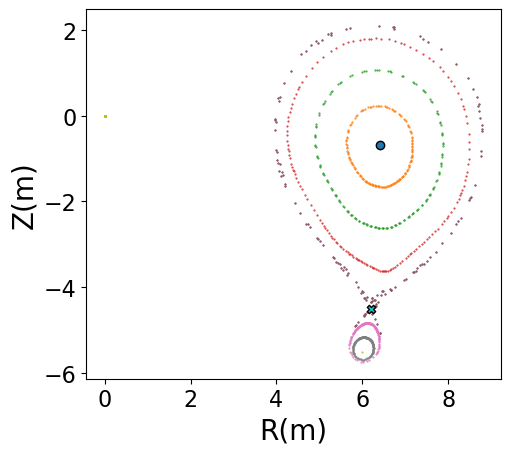

In [108]:
# ax_perturbed.set_xlim(6., 8)
# ax_perturbed.set_ylim(-4.6, -4)
fig_perturbed

In [74]:
ax_perturbed.scatter(manifold.clinics[0][0], manifold.clinics[0][1], marker="o", color="magenta", zorder=10)
ax_perturbed.scatter(manifold.clinics[1][0], manifold.clinics[1][1], marker="o", color="magenta", zorder=10)

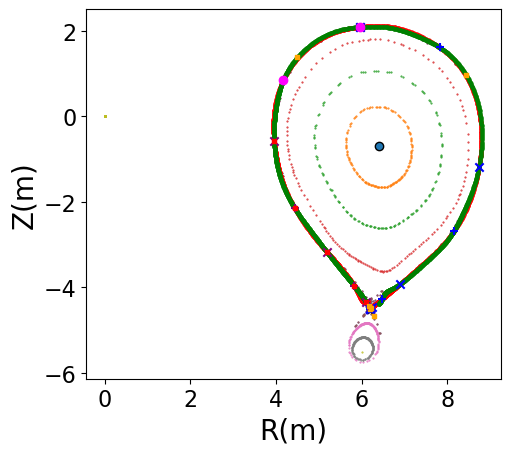

In [75]:
fig_perturbed

In [111]:
def resonance_area(self, n_b, n_f):
    # considering the >_u ordering of the homoclinic points
    areas = []
    for homoclinic in self.clinics:
        n_tmp_f, n_tmp_b = 1, 1

        # Forward integration
        rze_forward = homoclinic
        area_forward = []
        while n_tmp_f < n_f:
            rze_end, area_tmp = self.integrate_single(rze_forward, 1, direction=1, ret_jacobian=False, integrate_A=True)
            # if np.linalg.norm(rze_end - self.rfp_s) > np.linalg.norm(rze_forward - self.rfp_s):
            #     print("Forward integration goes away from saddle")
            rze_forward = rze_end
            ax_perturbed.scatter(rze_end[0], rze_end[1], marker="s", s=10, color="red", zorder=10)
            area_forward.append(area_tmp)
            n_tmp_f += 1
        
        # Backward integration
        rze_backward = homoclinic
        area_backward = []
        while n_tmp_b < n_b:
            rze_end, area_tmp = self.integrate_single(rze_backward, 1, direction=-1, ret_jacobian=False, integrate_A=True)
            rze_backward = rze_end
            ax_perturbed.scatter(rze_end[0], rze_end[1], marker="s", s=10, color="orange", zorder=10)
            area_backward.append(area_tmp)
            n_tmp_b += 1
        
        area_forward = np.array(area_forward)
        area_backward = np.array(area_backward)

        areas.append([area_forward, area_backward])
    return areas

In [127]:
are = resonance_area(manifold, 8, 10)
are

[[array([-12.3861058 , -18.85089196, -23.48600925,  -2.96679244,
           0.19297009,   0.31882228,   0.323247  ,   0.32349462,
           0.32616025]),
  array([14.84023688, 31.35062416, 19.05554761,  1.04334999, -0.27376626,
         -0.32519272, -0.4247095 ])],
 [array([ -7.09354306, -29.27559124, -10.90948282,  -0.31699676,
           0.3004874 ,   0.32260765,   0.32353836,   0.32805267,
           0.45691837]),
  array([24.07584928, 12.15116844, 36.92556582,  8.27358517,  0.07210175,
         -0.30783424, -0.27772831])]]

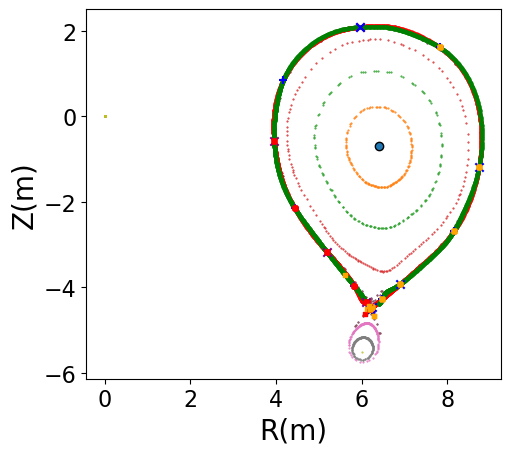

In [126]:
fig_perturbed

In [135]:
A1 = np.concatenate((-are[0][0][:10], are[0][1][:8])).sum()

In [134]:
A2 = np.concatenate((-are[1][0][:10], are[1][1][:8])).sum()

In [137]:
A2-A1

5.305521945767268

In [ ]:
are[1]-are[0]

1143.5521742022065

In [28]:
areas = []
for i in range(100,300,10):
    print(f"Computing for n = {i}")
    areas.append(resonance_area(manifold, i, i))

Computing for n = 100
Computing for n = 110
Computing for n = 120
Computing for n = 130
Computing for n = 140
Computing for n = 150
Computing for n = 160
Computing for n = 170
Computing for n = 180
Computing for n = 190
Computing for n = 200
Computing for n = 210
Computing for n = 220
Computing for n = 230
Computing for n = 240
Computing for n = 250
Computing for n = 260
Computing for n = 270
Computing for n = 280
Computing for n = 290


In [29]:
areas

[[-3005.0720610244143, -2877.1451401784884],
 [-3420.981507740906, -3204.9485484949955],
 [-3840.8703655796844, -3529.306733825262],
 [-4260.449352429296, -3912.627232276779],
 [-4678.292032716105, -4214.794283640778],
 [-5076.9043629189, -4407.309491660061],
 [-5457.554384393407, -4729.499454168134],
 [-5844.381296558427, -5063.1842578698015],
 [-6217.680520519931, -5427.673495317619],
 [-6493.716907350443, -5600.511620354688],
 [-6811.313261736583, -5667.761087534376],
 [-7213.579320022343, -5706.816929986077],
 [-7644.414159070753, -5714.540302834534],
 [-7991.790797563057, -5704.646026438832],
 [-8364.381011712814, -5716.013293061884],
 [-8682.451855970958, -5745.308162502678],
 [-9010.150171530917, -6064.441990199455],
 [-9306.878998492157, -6229.86790317888],
 [-9694.629844658168, -6572.674862911241],
 [-10083.425667237567, -6881.393579523733]]

In [30]:
areas = np.array(areas)
areas

array([[ -3005.07206102,  -2877.14514018],
       [ -3420.98150774,  -3204.94854849],
       [ -3840.87036558,  -3529.30673383],
       [ -4260.44935243,  -3912.62723228],
       [ -4678.29203272,  -4214.79428364],
       [ -5076.90436292,  -4407.30949166],
       [ -5457.55438439,  -4729.49945417],
       [ -5844.38129656,  -5063.18425787],
       [ -6217.68052052,  -5427.67349532],
       [ -6493.71690735,  -5600.51162035],
       [ -6811.31326174,  -5667.76108753],
       [ -7213.57932002,  -5706.81692999],
       [ -7644.41415907,  -5714.54030283],
       [ -7991.79079756,  -5704.64602644],
       [ -8364.38101171,  -5716.01329306],
       [ -8682.45185597,  -5745.3081625 ],
       [ -9010.15017153,  -6064.4419902 ],
       [ -9306.87899849,  -6229.86790318],
       [ -9694.62984466,  -6572.67486291],
       [-10083.42566724,  -6881.39357952]])

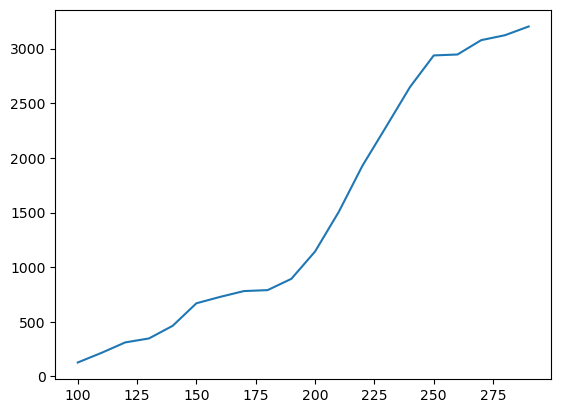

In [35]:
plt.plot(np.arange(100,300,10), areas[:,1]-areas[:,0])

In [ ]:
# dumpname = "../output/toybox_tok_04151041.pkl"
dumpname = "../../runs/toybox-tok-shear-1504/perturbed-3-2/poincare_04161004.pkl"

# fig_perturbed = pickle.load(open("../output/toybox_.pkl", "rb"))
fig_perturbed = pickle.load(open(dumpname, "rb"))
ax_perturbed = fig_perturbed.get_axes()[0]

for col in ax_perturbed.collections:
    col.set_color('black')
    col.set_sizes([0.5])

plt.show()

In [ ]:
ax_perturbed.set_xlim(3, 9)
ax_perturbed.set_ylim(-6, 2.3)

In [ ]:
ax_perturbed.set_xlim(6., 6.4)
ax_perturbed.set_ylim(-4.6, -4.4)

In [ ]:
fig_perturbed

In [ ]:
out = manifold.stable['+'].T.flatten()
plt.plot(out[::2], out[1::2], '-o', label='stable manifold')
plt.legend()

In [ ]:
plt.plot(rzs[:,0], rzs[:,1], '-o')

In [ ]:
out = rzs_ev.T
for yy in out:
    plt.plot(yy[::2], yy[1::2], '-o')

In [ ]:
fig_perturbed, ax_perturbed = pplot.plot(marker=".", s=1)

ax_perturbed.set_xlim(6.18, 6.25)
ax_perturbed.set_ylim(-4.55, -4.45)

manifold.plot(ax_perturbed, directions="s+u+")

In [ ]:
# general view
ax_perturbed.set_xlim(2.3, 4)
ax_perturbed.set_ylim(-1.9,1)

In [ ]:
# plan americain
ax_perturbed.set_xlim(3, 3.2)
ax_perturbed.set_ylim(-1.7, -1.6)

In [ ]:
# close up view
ax_perturbed.set_xlim(3.08, 3.13)
ax_perturbed.set_ylim(-1.67, -1.63)

In [ ]:
ax_perturbed.set_xlim(4, 8)
ax_perturbed.set_ylim(-8, 3)

In [ ]:
ax_perturbed.set_xlim(6.15, 6.26)
ax_perturbed.set_ylim(-4.6, -4.4)

In [ ]:
fig_perturbed